In [1]:
import numpy as np
import scipy as sp

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


## Make Y_0

In [2]:
# normal dist
N = 10000
mean = 75
std = 10
y_0 = np.random.normal(loc=mean, scale=std, size=N)
y_0 = np.round(y_0, 2)

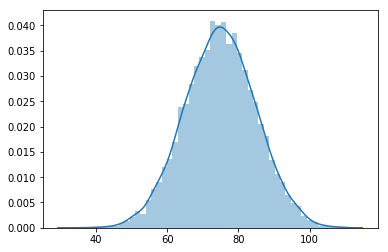

In [3]:
sns.distplot(y_0)

## Make Treatment Effect and Y_1

In [4]:
true_treatment_effect_mean = 10
true_treatment_effect = np.round(np.random.normal(loc=true_treatment_effect_mean, scale=0.1, size=N) 
                         + np.random.uniform(-true_treatment_effect_mean/20, true_treatment_effect_mean/20, size=N),2)

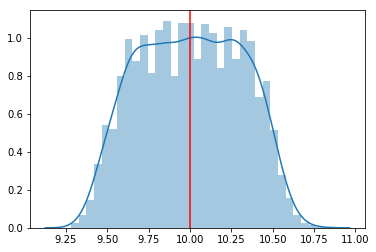

In [5]:
sns.distplot(true_treatment_effect)
plt.axvline(true_treatment_effect.mean(), color = 'r')
plt.show()

In [6]:
y_1 = y_0 + true_treatment_effect

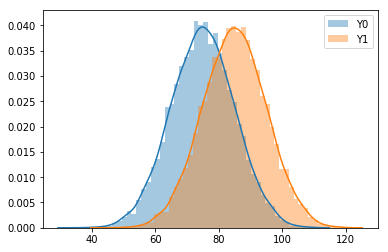

In [7]:
sns.distplot(y_0, label='Y0')
sns.distplot(y_1, label='Y1')
plt.legend()
plt.show()

## Add Never Buyers, conditional buyers, and do not disturbs

In [8]:
# never buyers
frac_never_buyers = 0.05
never_buyers_indices = np.random.choice(a = np.arange(y_0.size), 
                                      size = int(y_0.size *frac_never_buyers), replace = False)
y_0[never_buyers_indices] = 0
y_1[never_buyers_indices] = 0
true_treatment_effect[never_buyers_indices] = 0

In [9]:
# conditional buyers
frac_conditional_buyers = 0.05
conditional_buyers_indices = np.random.choice(a = np.arange(y_0.size), 
                                      size = int(y_0.size *frac_conditional_buyers), replace = False)
y_0[conditional_buyers_indices] = 0
# y_1 is not zeroed out since they buy if targeted
true_treatment_effect[conditional_buyers_indices] = true_treatment_effect[conditional_buyers_indices] + y_0[conditional_buyers_indices]

In [10]:
# dnds
frac_dnd_buyers = 0.05
dnd_buyers_indices = np.random.choice(a = np.arange(y_0.size), 
                                      size = int(y_0.size *frac_dnd_buyers), replace = False)
# y_0 is unchanged for them
y_1[dnd_buyers_indices] = 0 #do not buy if targeted
true_treatment_effect[dnd_buyers_indices] = -y_1[dnd_buyers_indices]

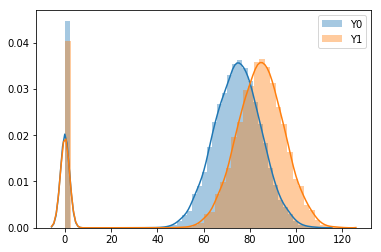

In [11]:
sns.distplot(y_0, label='Y0')
sns.distplot(y_1, label='Y1')
plt.legend()
plt.show()

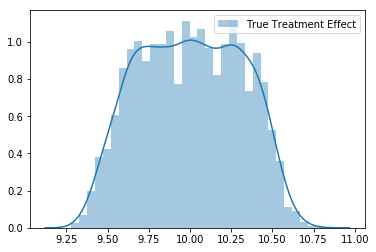

In [12]:
sns.distplot(true_treatment_effect[true_treatment_effect>0], label='True Treatment Effect')
plt.legend()
plt.show()

## END OF DAT GEN

In [13]:
price_of_treatment = 5
print('Profit when doing nothing: {}'.format(y_0.sum()))
print('Profit when targeting all: {}'.format(y_1.sum() - (price_of_treatment*N)))

Profit when doing nothing: 674555.37
Profit when targeting all: 715677.27


In [14]:
true_treatment_effect_mean

10

## Classical RTC

In [17]:
?np.arange

In [84]:
rtc_outcome = y_0.copy() # initialise outcome with y0
rtc_indices = np.random.choice(a = np.arange(y_0.size), 
                                      size = int(y_0.size * 0.5), replace = False)
rtc_outcome[rtc_indices] = y_1[rtc_indices]
rtc_mask = np.ones_like(y_0, dtype=bool)
rtc_mask[rtc_indices] = False

In [85]:
#outcome
print('Estimated Treatment Effect: {}'.format(rtc_outcome[~rtc_mask].mean() - rtc_outcome[rtc_mask].mean()))
print('True Treatment Effect:      {}'.format(true_treatment_effect.mean()))
print('Profit:         {}'.format(rtc_outcome.sum()))
print('Targeting none: {}'.format(y_0.sum()))
print('Targeting all:  {}'.format(y_1.sum()))

Estimated Treatment Effect: 9.180714000000009
True Treatment Effect:      9.033029
Profit:         720729.17
Targeting none: 674555.37
Targeting all:  765677.27


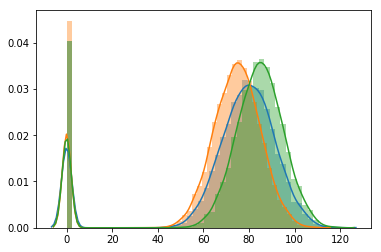

In [55]:
sns.distplot(rtc_outcome)
sns.distplot(y_0)
sns.distplot(y_1)
plt.show()

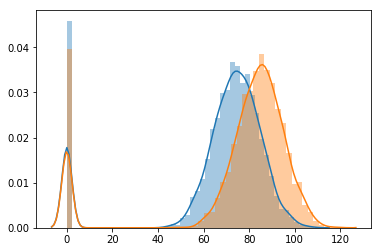

In [56]:
sns.distplot(rtc_outcome[rtc_mask])
sns.distplot(rtc_outcome[(~rtc_mask)])
plt.show()

## Imbalanced Targeting

In [78]:
imb_ratio = 0.80
imb_outcome = y_0.copy() # initialise outcome with y0
imb_indices = np.random.choice(a = np.arange(y_0.size), 
                                      size = int(y_0.size * imb_ratio), replace = False)
imb_outcome[imb_indices] = y_1[imb_indices]
imb_mask = np.ones_like(y_0, dtype=bool)
imb_mask[imb_indices] = False

In [82]:
#outcome
print('Estimated Treatment Effect: {}'.format(imb_outcome[~imb_mask].mean() - imb_outcome[imb_mask].mean()))
print('True Treatment Effect:      {}'.format(true_treatment_effect.mean()))
print('Profit:         {}'.format(imb_outcome.sum()))
print('Targeting none: {}'.format(y_0.sum()))
print('Targeting all:  {}'.format(y_1.sum()))

Estimated Treatment Effect: 8.872837499999989
True Treatment Effect:      9.033029
Profit:         748310.85
Targeting none: 674555.37
Targeting all:  765677.27
